# Data Science Project: [Project Title]

**Author**: Samer Eladad

**Entry Date**: 18.02.

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Define the paths to your datasets
amazon_prime_path = '/Users/samer/Documents/github_repos/StreamSelect/OTT_SUGGESTER/data/raw/raw_amazon_prime.csv'
disney_plus_path = '/Users/samer/Documents/github_repos/StreamSelect/OTT_SUGGESTER/data/raw/raw_disney_plus.csv'
netflix_path = '/Users/samer/Documents/github_repos/StreamSelect/OTT_SUGGESTER/data/raw/raw_netflix.csv'
imdb_path = '/Users/samer/Documents/github_repos/StreamSelect/OTT_SUGGESTER/data/raw/raw_imdb.csv'

# Import the datasets into pandas DataFrames
amazon_prime_df = pd.read_csv(amazon_prime_path)
disney_plus_df = pd.read_csv(disney_plus_path)
netflix_df = pd.read_csv(netflix_path)
imdb_df = pd.read_csv(imdb_path)

In [9]:
# Display Netflix Dataset column names
print("\nNetflix column names:")
print(netflix_df.columns.tolist())


Netflix column names:
['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added', 'release_year', 'rating', 'duration', 'listed_in', 'description']


In [10]:
# Display IDMB Movies Dataset column names
print("\nIMDB Movies column names:")
print(imdb_df.columns.tolist())


IMDB Movies column names:
['Poster_Link', 'Series_Title', 'Released_Year', 'Certificate', 'Runtime', 'Genre', 'IMDB_Rating', 'Overview', 'Meta_score', 'Director', 'Star1', 'Star2', 'Star3', 'Star4', 'No_of_Votes', 'Gross']


### First task: Analyze the Netflix dataset

**Challenge 1**: Not all required information can be found on the Netflix DS</br>
**Solution**: We will use a new DS 'IMDB Movies Dataset' and join on Movie names. 

In [3]:
'''
-- Select all Netflix Movies
SELECT Netflix.title
FROM Netflix
WHERE Netflix.type = 'Movie' 
'''
# There are 6131 movies in the Netflix database

"\n-- Select all Netflix Movies\nSELECT Netflix.title\nFROM Netflix\nWHERE Netflix.type = 'Movie' \n"

In [4]:
'''
-- Select all IMDB Movies
SELECT DISTINCT IMDB.Series_Title
FROM IMDB'''
# There are 999 movies in the IMDB database

'\n-- Select all IMDB Movies\nSELECT DISTINCT IMDB.Series_Title\nFROM IMDB'

In [ ]:
'''
-- Select Movies that are in the IMDB & Netflix DISTINCT
SELECT IMDB.Series_Title
FROM IMDB
INNER JOIN Netflix ON IMDB.Series_Title = Netflix.title
'''
# There are only 172 movies that are in both databases

In [ ]:
'''-- Check if there are any differences between IDMB Genre column and Netflix listed_in column
SELECT IMDB.Series_Title, IMDB.Genre, Netflix.listed_in
FROM IMDB
INNER JOIN Netflix ON IMDB.Series_Title = Netflix.title
'''
# There are differences between the two columns (for example Action, Adventure vs. Action & Adventure)

**Challenge 2**: Genre column on IMDB DS has slightly different information than listed_in column on Netflix DS.</br>
**Solution**: We will use IMDB Genre column for Movie Genres for now.

In [11]:
# Combined the Netflix and IMDB datasets on the Movie title columns
netflix_imdb_path = '/Users/samer/Documents/github_repos/StreamSelect/OTT_SUGGESTER/data/raw/raw_combined_netflix_imdb.csv'
netflix_imdb_df = pd.read_csv(netflix_imdb_path)

In [13]:
print('\nRaw Combined Netflix & IMDB Dataset column names:')
print(netflix_imdb_df.columns.tolist())


Raw Combined Netflix & IMDB Dataset column names:
['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added', 'release_year', 'rating', 'duration', 'listed_in', 'description', 'Poster_Link', 'Series_Title', 'Released_Year', 'Certificate', 'Runtime', 'Genre', 'IMDB_Rating', 'Overview', 'Meta_score', 'Director', 'Star1', 'Star2', 'Star3', 'Star4', 'No_of_Votes', 'Gross']


Genre
Drama        135
Crime         43
Comedy        37
Action        33
Adventure     25
Biography     25
Thriller      24
Romance       19
Mystery       15
Sci-Fi        10
Family         9
Fantasy        7
Animation      7
War            6
Musical        5
History        5
Sport          5
Western        5
Horror         4
Music          4
Name: count, dtype: int64


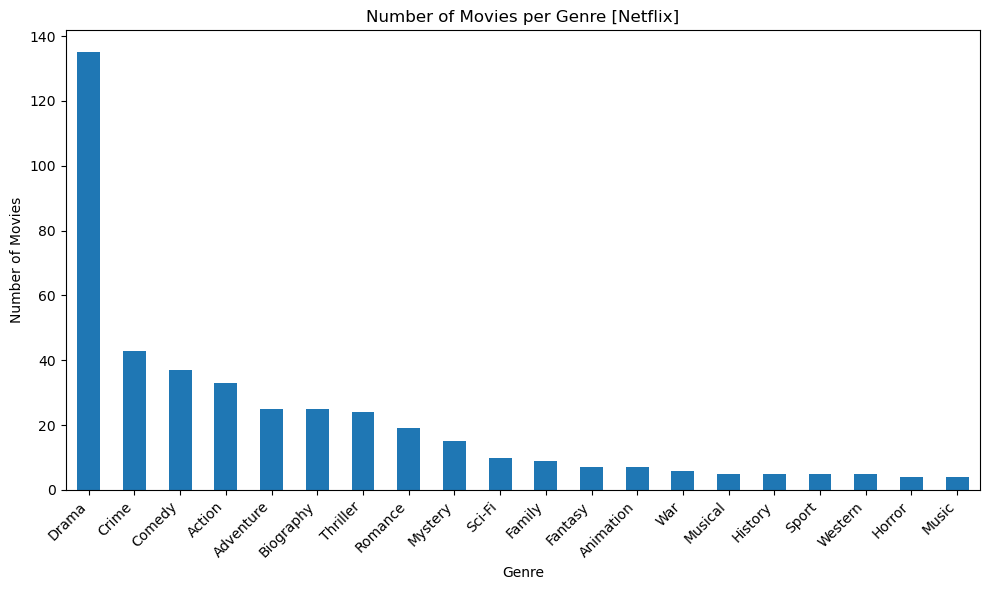

In [31]:
# Display relationship between Movie genre and number of movies [Netflix & IMDB]

# Split the 'Genre' column into lists, stack them into a single Series, and then count occurrences
netflix_genre_counts = netflix_imdb_df['Genre'].str.split(', ').explode().value_counts()
print(netflix_genre_counts)

# Plotting the counts as above
plt.figure(figsize=(10, 6))
netflix_genre_counts.plot(kind='bar')
plt.title('Number of Movies per Genre [Netflix]')
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45, ha="right")
plt.tight_layout()

plt.show()


In [18]:
# Combined the Prime Video and IMDB datasets on the Movie title columns (Uzair's Code)
amazon_prime_imdb_path = '/Users/samer/Documents/github_repos/StreamSelect/OTT_SUGGESTER/data/raw/raw_combined_prime_imdb.csv'
amazon_prime_imdb_df = pd.read_csv(amazon_prime_imdb_path)

Genre
Drama        48
Comedy       20
Crime        13
Romance      13
Biography     8
Thriller      8
Action        7
Mystery       7
Adventure     7
Horror        6
Fantasy       4
Music         3
Sci-Fi        3
Animation     2
Film-Noir     2
Western       2
Family        2
History       1
Musical       1
Sport         1
War           1
Name: count, dtype: int64


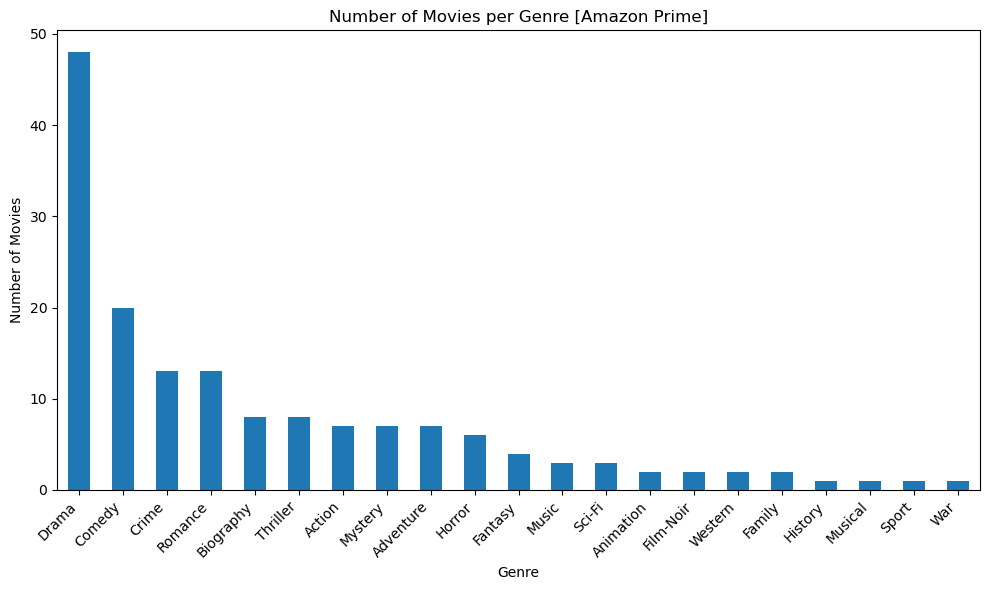

In [32]:
# Display relationship between Movie genre and number of movies [Amazon Prime & IMDB]

# Split the 'Genre' column into lists, stack them into a single Series, and then count occurrences
amazon_genre_counts = amazon_prime_imdb_df['Genre'].str.split(', ').explode().value_counts()
print(amazon_genre_counts)

# Plotting the counts as above
plt.figure(figsize=(10, 6))
amazon_genre_counts.plot(kind='bar')
plt.title('Number of Movies per Genre [Amazon Prime]')
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45, ha="right")
plt.tight_layout()

plt.show()


In [33]:
# Combined the Disney plus and IMDB datasets on the Movie title columns
disney_imdb_path = '/Users/samer/Documents/github_repos/StreamSelect/OTT_SUGGESTER/data/raw/raw_combined_disney_imdb.csv'
disney_imdb_df = pd.read_csv(disney_imdb_path)

Genre
Adventure    31
Animation    27
Comedy       22
Family       13
Drama        11
Biography     7
Fantasy       7
Action        6
History       2
Romance       1
Sci-Fi        1
Sport         1
Name: count, dtype: int64


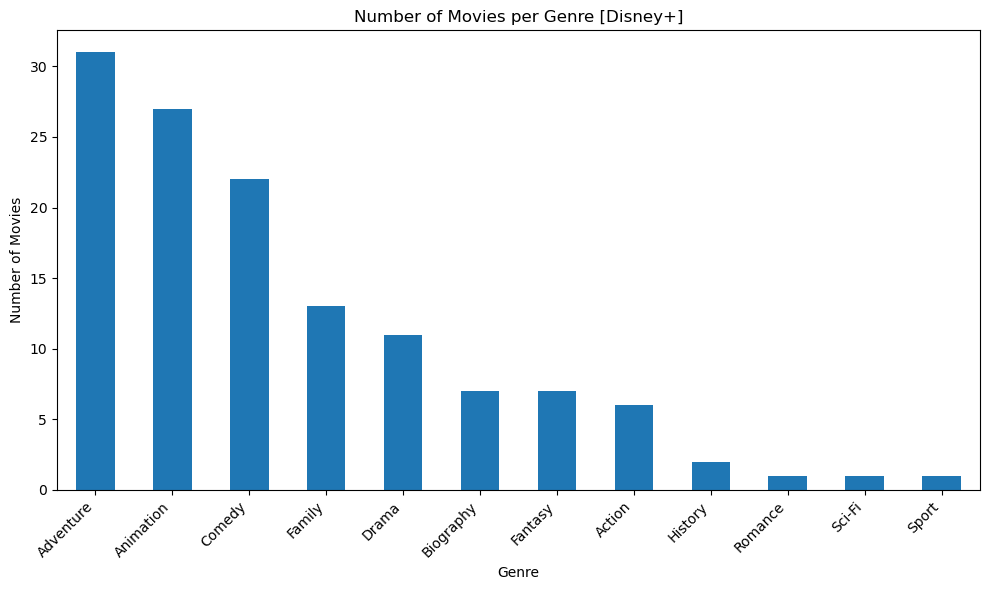

In [34]:
# Display relationship between Movie genre and number of movies [Disney plus & IMDB]

# Split the 'Genre' column into lists, stack them into a single Series, and then count occurrences
disney_genre_counts = disney_imdb_df['Genre'].str.split(', ').explode().value_counts()
print(disney_genre_counts)

# Plotting the counts as above
plt.figure(figsize=(10, 6))
disney_genre_counts.plot(kind='bar')
plt.title('Number of Movies per Genre [Disney+]')
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45, ha="right")
plt.tight_layout()

plt.show()


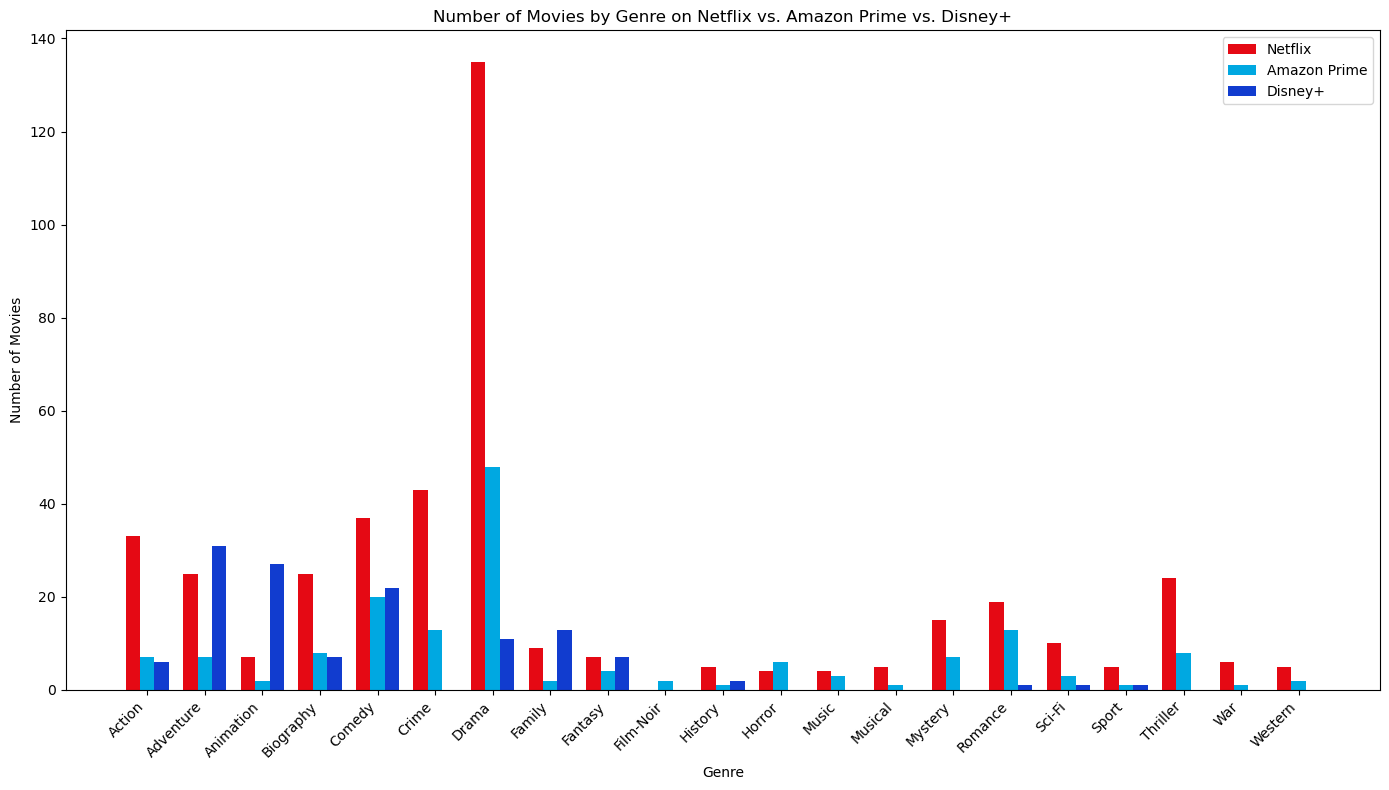

In [41]:
# Creating a new DataFrame for plotting
combined_genre_counts = pd.DataFrame({
    'Netflix': netflix_genre_counts,
    'Amazon Prime': amazon_genre_counts,
    'Disney+': disney_genre_counts
}).fillna(0)  # Fill missing values with zeroes

# Ensure all genres are included and aligned
genres = combined_genre_counts.index

# Setting up the positions for the bars
ind = np.arange(len(genres))  # the x locations for the groups
width = 0.25  # the width of the bars

fig, ax = plt.subplots(figsize=(14, 8))
rects1 = ax.bar(ind - width, combined_genre_counts['Netflix'], width, label='Netflix', color='#E50914')
rects2 = ax.bar(ind, combined_genre_counts['Amazon Prime'], width, label='Amazon Prime', color='#00A8E1')
rects3 = ax.bar(ind + width, combined_genre_counts['Disney+'], width, label='Disney+', color='#113CCF')

# Add some text for labels, title and axes ticks
ax.set_xlabel('Genre')
ax.set_ylabel('Number of Movies')
ax.set_title('Number of Movies by Genre on Netflix vs. Amazon Prime vs. Disney+')
ax.set_xticks(ind)
ax.set_xticklabels(genres, rotation=45, ha="right")
ax.legend()

plt.tight_layout()
plt.show()

## Next steps:
- Plot revenue
- Plot movie duration
- Plot IMDB rating
- Plot PG Rating